In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing,linear_model, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import os , re

In [136]:
data = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')


In [99]:
data.Summary.sample(3)

47022     The only dry cereal I've ever loved!
152274                           Bonsai Review
1076                         Great Ingredients
Name: Summary, dtype: object

In [137]:
data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [100]:
data.Text[536220]

'let tell folk    several year ago tried br   dreamfield pasta also spinach  i never bought br   diet kind pasta i found i diabetes br   month ago  br    br   had revamp cupboard food help problem  br   i ordered pasta amazon com  you would br   amazed  1  first time i questioning br   cooking al dente following instruction  2  cooking br   beyond al dente bit made difference br   world pasta tasted good ronzoni br   pasta  br    br   i bring name next diabetes class br   august share folk '

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [102]:
data.shape

(568454, 10)

In [103]:
data.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

## Text preprocessing

In [104]:
data.Text.tail(5)

568449    great sesame chicken  good better resturants i...
568450    i disappointed flavor  the chocolate note espe...
568451    these star small  give 10 15 one training sess...
568452    these best treat training rewarding dog good g...
568453    i satisfied  product advertised  i use cereal ...
Name: Text, dtype: object

In [ ]:
def pipline(text):
    
    text = re.sub('[  ]+',' ', text)
    text = re.sub('[^\w]' ,' ', text)
    text = re.sub(r'!([^\s]+)' , r'\1',text)
    text = re.sub(r',([^\s]+)' , r'\1',text)
    
    stpwrd = stopwords.words('english')
    text = ' '.join([ word.lower() for word in text.split(' ') if word not in stpwrd ])
    
    lemma = WordNetLemmatizer()
    text = ' '.join(lemma.lemmatize(word) for word in text.split(' ') )
    
    #text = ' '.join(str(TextBlob(word).correct()) for word in text.split(' ') )
    
    return text    

In [ ]:
#for index in range(len(data) ):
data.Text = data.Text.apply(pipline)

In [105]:
data.Text.head(5)

0    i bought several vitality canned dog food prod...
1    product arrived labeled jumbo salted peanut   ...
2    this confection around century  it light  pill...
3    if looking secret ingredient robitussin i beli...
4    great taffy great price  there wide assortment...
Name: Text, dtype: object

## Exploratory Data Analysis

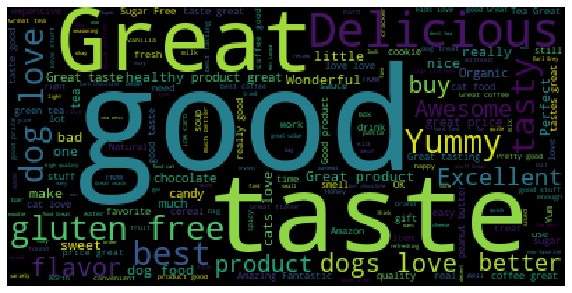

In [106]:
from wordcloud import WordCloud
stringg = data.Summary.str.cat()
wcloud = WordCloud().generate(stringg)
plt.figure(figsize = [10,23])
plt.imshow(wcloud)
plt.axis('off')
(-0.5 ,399.5 , 199.5 ,-0.5)
plt.show()

In [107]:
Negative_R = data[ data.Score.isin([1,2])]
Neutral_R = data[ data.Score == 3 ]
Positive_R = data[ data.Score.isin([4,5])]

## Postive WordCloud

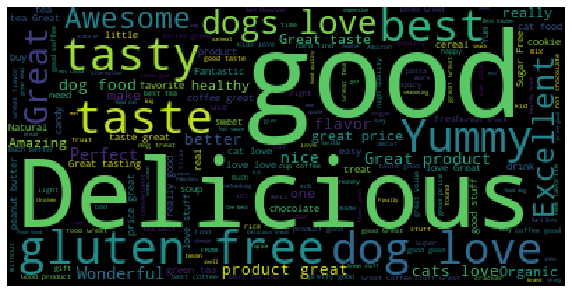

In [108]:
stringg = Positive_R.Summary.str.cat()
wcloud = WordCloud().generate(stringg)
plt.figure(figsize = [10,23])
plt.imshow(wcloud)
plt.axis('off')
(-0.5,399.5,199.5,-0.5)
plt.show()

## Negative WordCloud

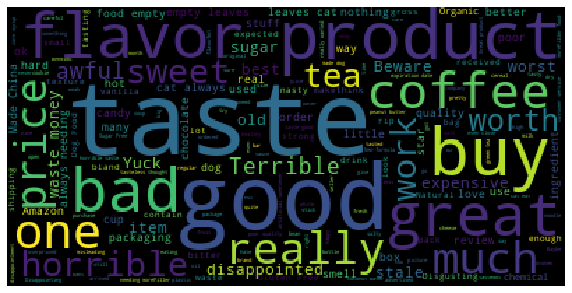

In [109]:
stringg = Negative_R.Summary.str.cat()
wcloud = WordCloud().generate(stringg)
plt.figure(figsize = [10,23])
plt.imshow(wcloud)
plt.axis('off')
(-0.5,399.5,199.5,-0.5)
plt.show()

## Neutral Reviews

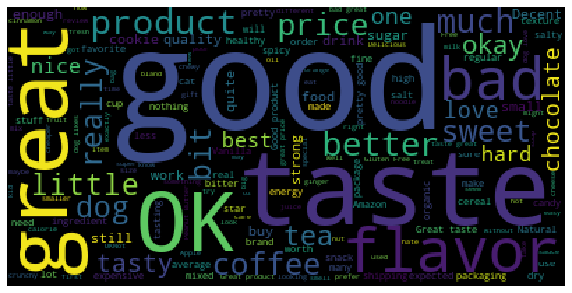

In [110]:
stringg = Neutral_R.Summary.str.cat()
wcloud = WordCloud().generate(stringg)
plt.figure(figsize = [10,23])
plt.imshow(wcloud)
plt.axis('off')
(-0.5,399.5,199.5,-0.5)
plt.show()

In [111]:
data.Reviews = np.where( data.Score > 2 , 'Positive' , 'Negative')
NewData = pd.DataFrame( {'Text' : data.Text , 'Review' : data.Reviews} )
NewData

,Text,Review
0,i bought several vitality canned dog food prod...,1
1,product arrived labeled jumbo salted peanut ...,0
2,this confection around century it light pill...,1
3,if looking secret ingredient robitussin i beli...,0
4,great taffy great price there wide assortment...,1
...,...,...
568449,great sesame chicken good better resturants i...,1
568450,i disappointed flavor the chocolate note espe...,0
568451,these star small give 10 15 one training sess...,1
568452,these best treat training rewarding dog good g...,1


## Feature Engineering 

In [ ]:
NewData.dropna(inplace = True)
NewData.Review = np.where( NewData.Review == 'Positive' , 1 , 0 )

In [88]:
train_x , test_x , train_y , test_y = train_test_split( NewData.Text , NewData.Review , test_size = 0.2 , random_state = 1 )


In [89]:
tfidf = TfidfVectorizer( analyzer='word' , max_features = 5000 )
tfidf.fit(NewData.Text)
train_x = tfidf.transform(train_x)
test_x = tfidf.transform(test_x)

## Model Selection And Evaluation

In [112]:
LR = LogisticRegression().fit( train_x , train_y )
accuracy_score( LR.predict( test_x ) , test_y )

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9185071817470161

In [138]:
data = input('You\'re review is \n')
sample = tfidf.transform([data])
if LR.predict(sample)[0] == 1 :
    print('--> Positive')
else:
    print('--> Negative')
 

You're review is 
Quality of product are not upto the marks but it just best we can get
--> Positive


In [ ]:
data = input('You\'re review is \n')
sample = tfidf.transform([data])
if LR.predict(sample)[0] == 1 :
    print('--> Positive')
else:
    print('--> Negative')

In [134]:
import pickle
filename = 'Amazon.sav'
pickle.dump(LR, open(filename, 'wb'))